                                                Diabetes Dataset Assignment

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# loads the dataset from the CSV file.
data = pd.read_csv("C:\Ozy\Data Science\DS datasets\diabetes.csv")

In [131]:
# Displays first 5 rows of the dataset.
data.head() 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [132]:
# Provides basic information about the dataset, including the number of non-null entries.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [133]:
# Summary statistics for numerical columns.
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<Figure size 1200x800 with 0 Axes>

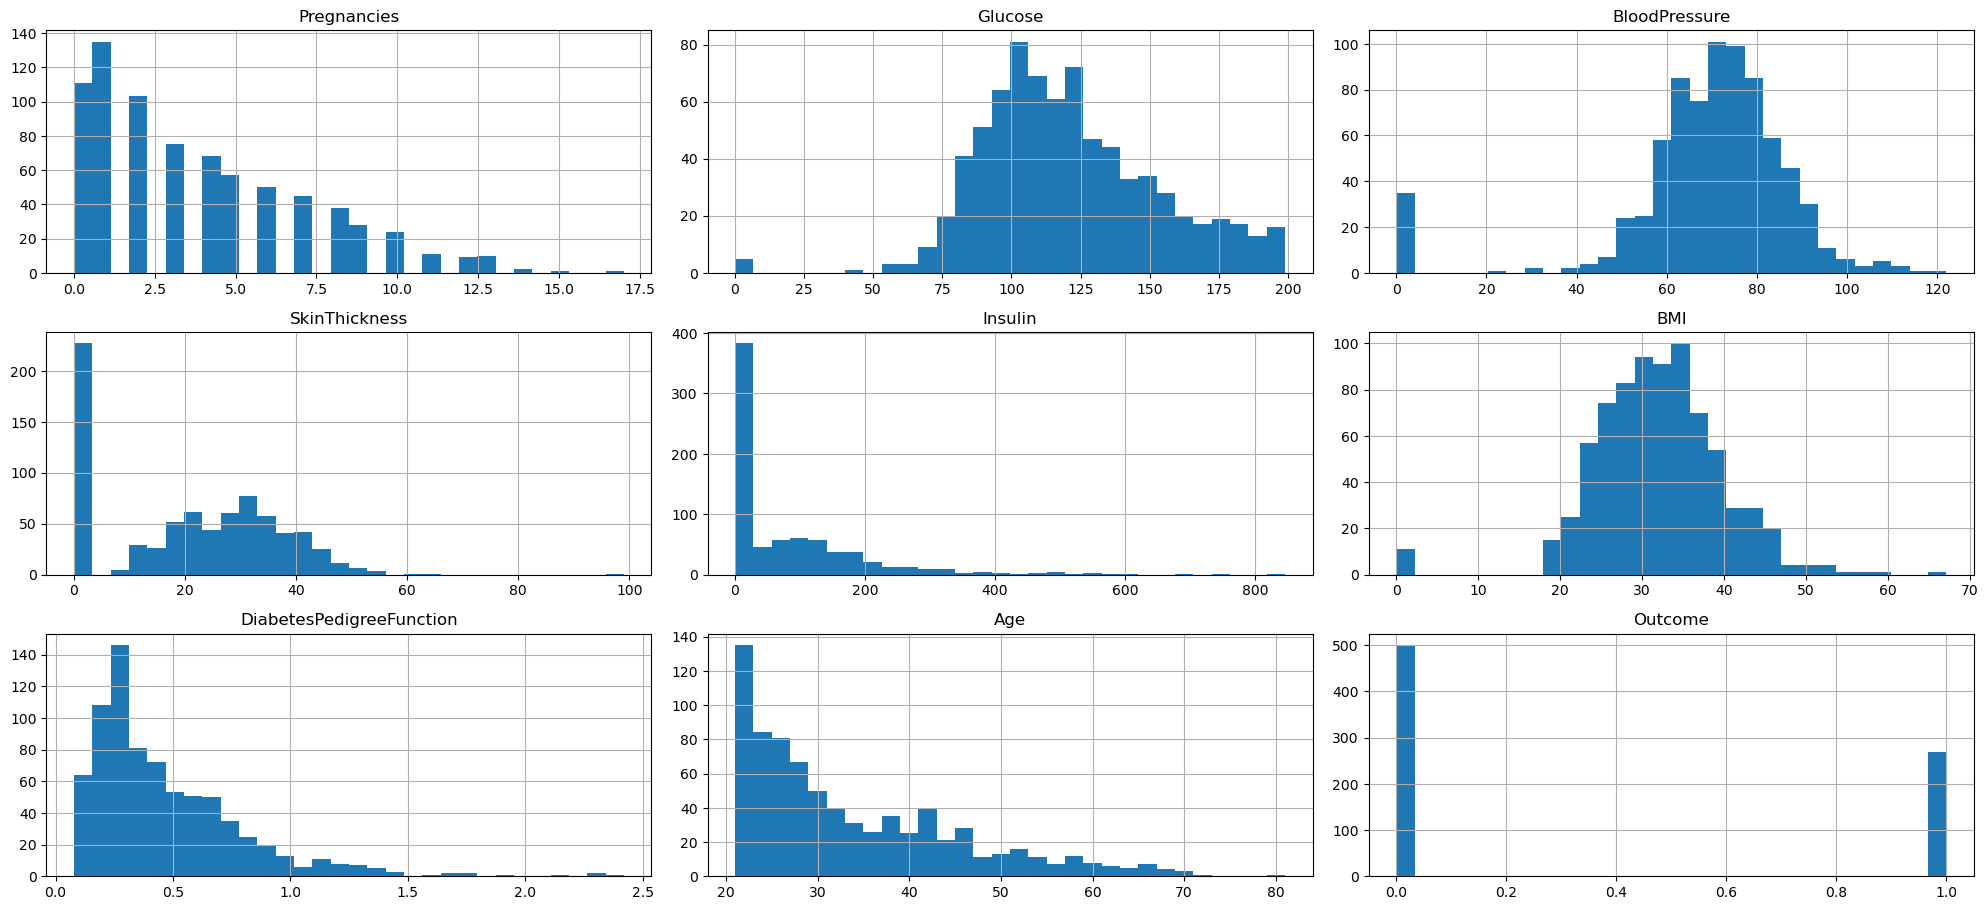

In [134]:
# Distribution of key features
plt.figure(figsize=(12, 8))
data.hist(bins=30, figsize=(20, 15), layout=(5, 3))
plt.tight_layout()
plt.show()

In [135]:
# Identify and handle missing or null values
data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- No missing values present in the dataset

In [84]:
# Define target variable (assuming the target variable is 'Outcome')
target = 'Outcome'

In [85]:
# Print the correlation values for each feature with respect to the target variable.
correlation_matrix = data.corr()
print(correlation_matrix['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


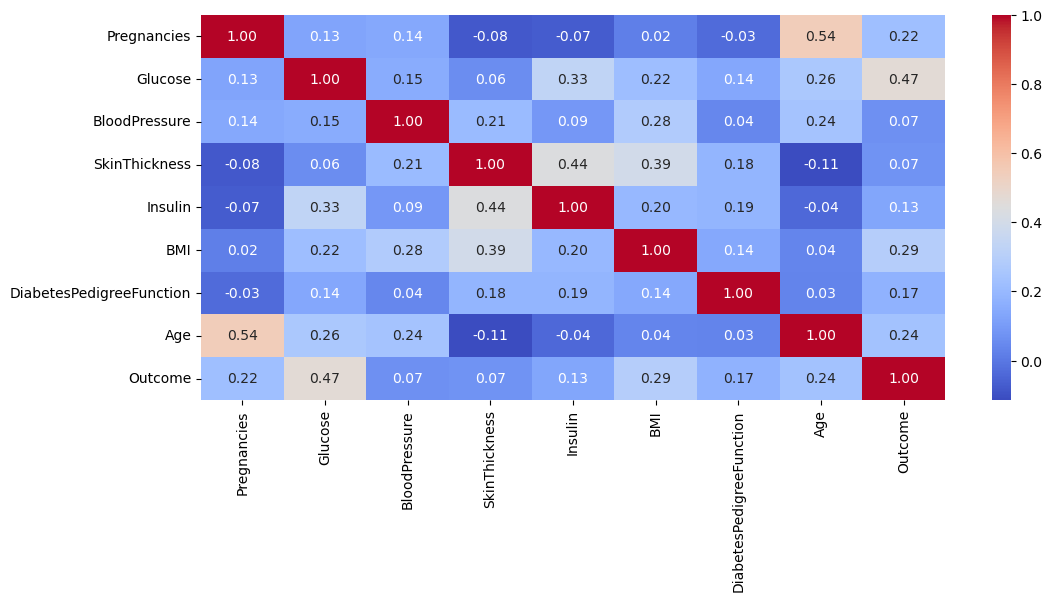

In [86]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


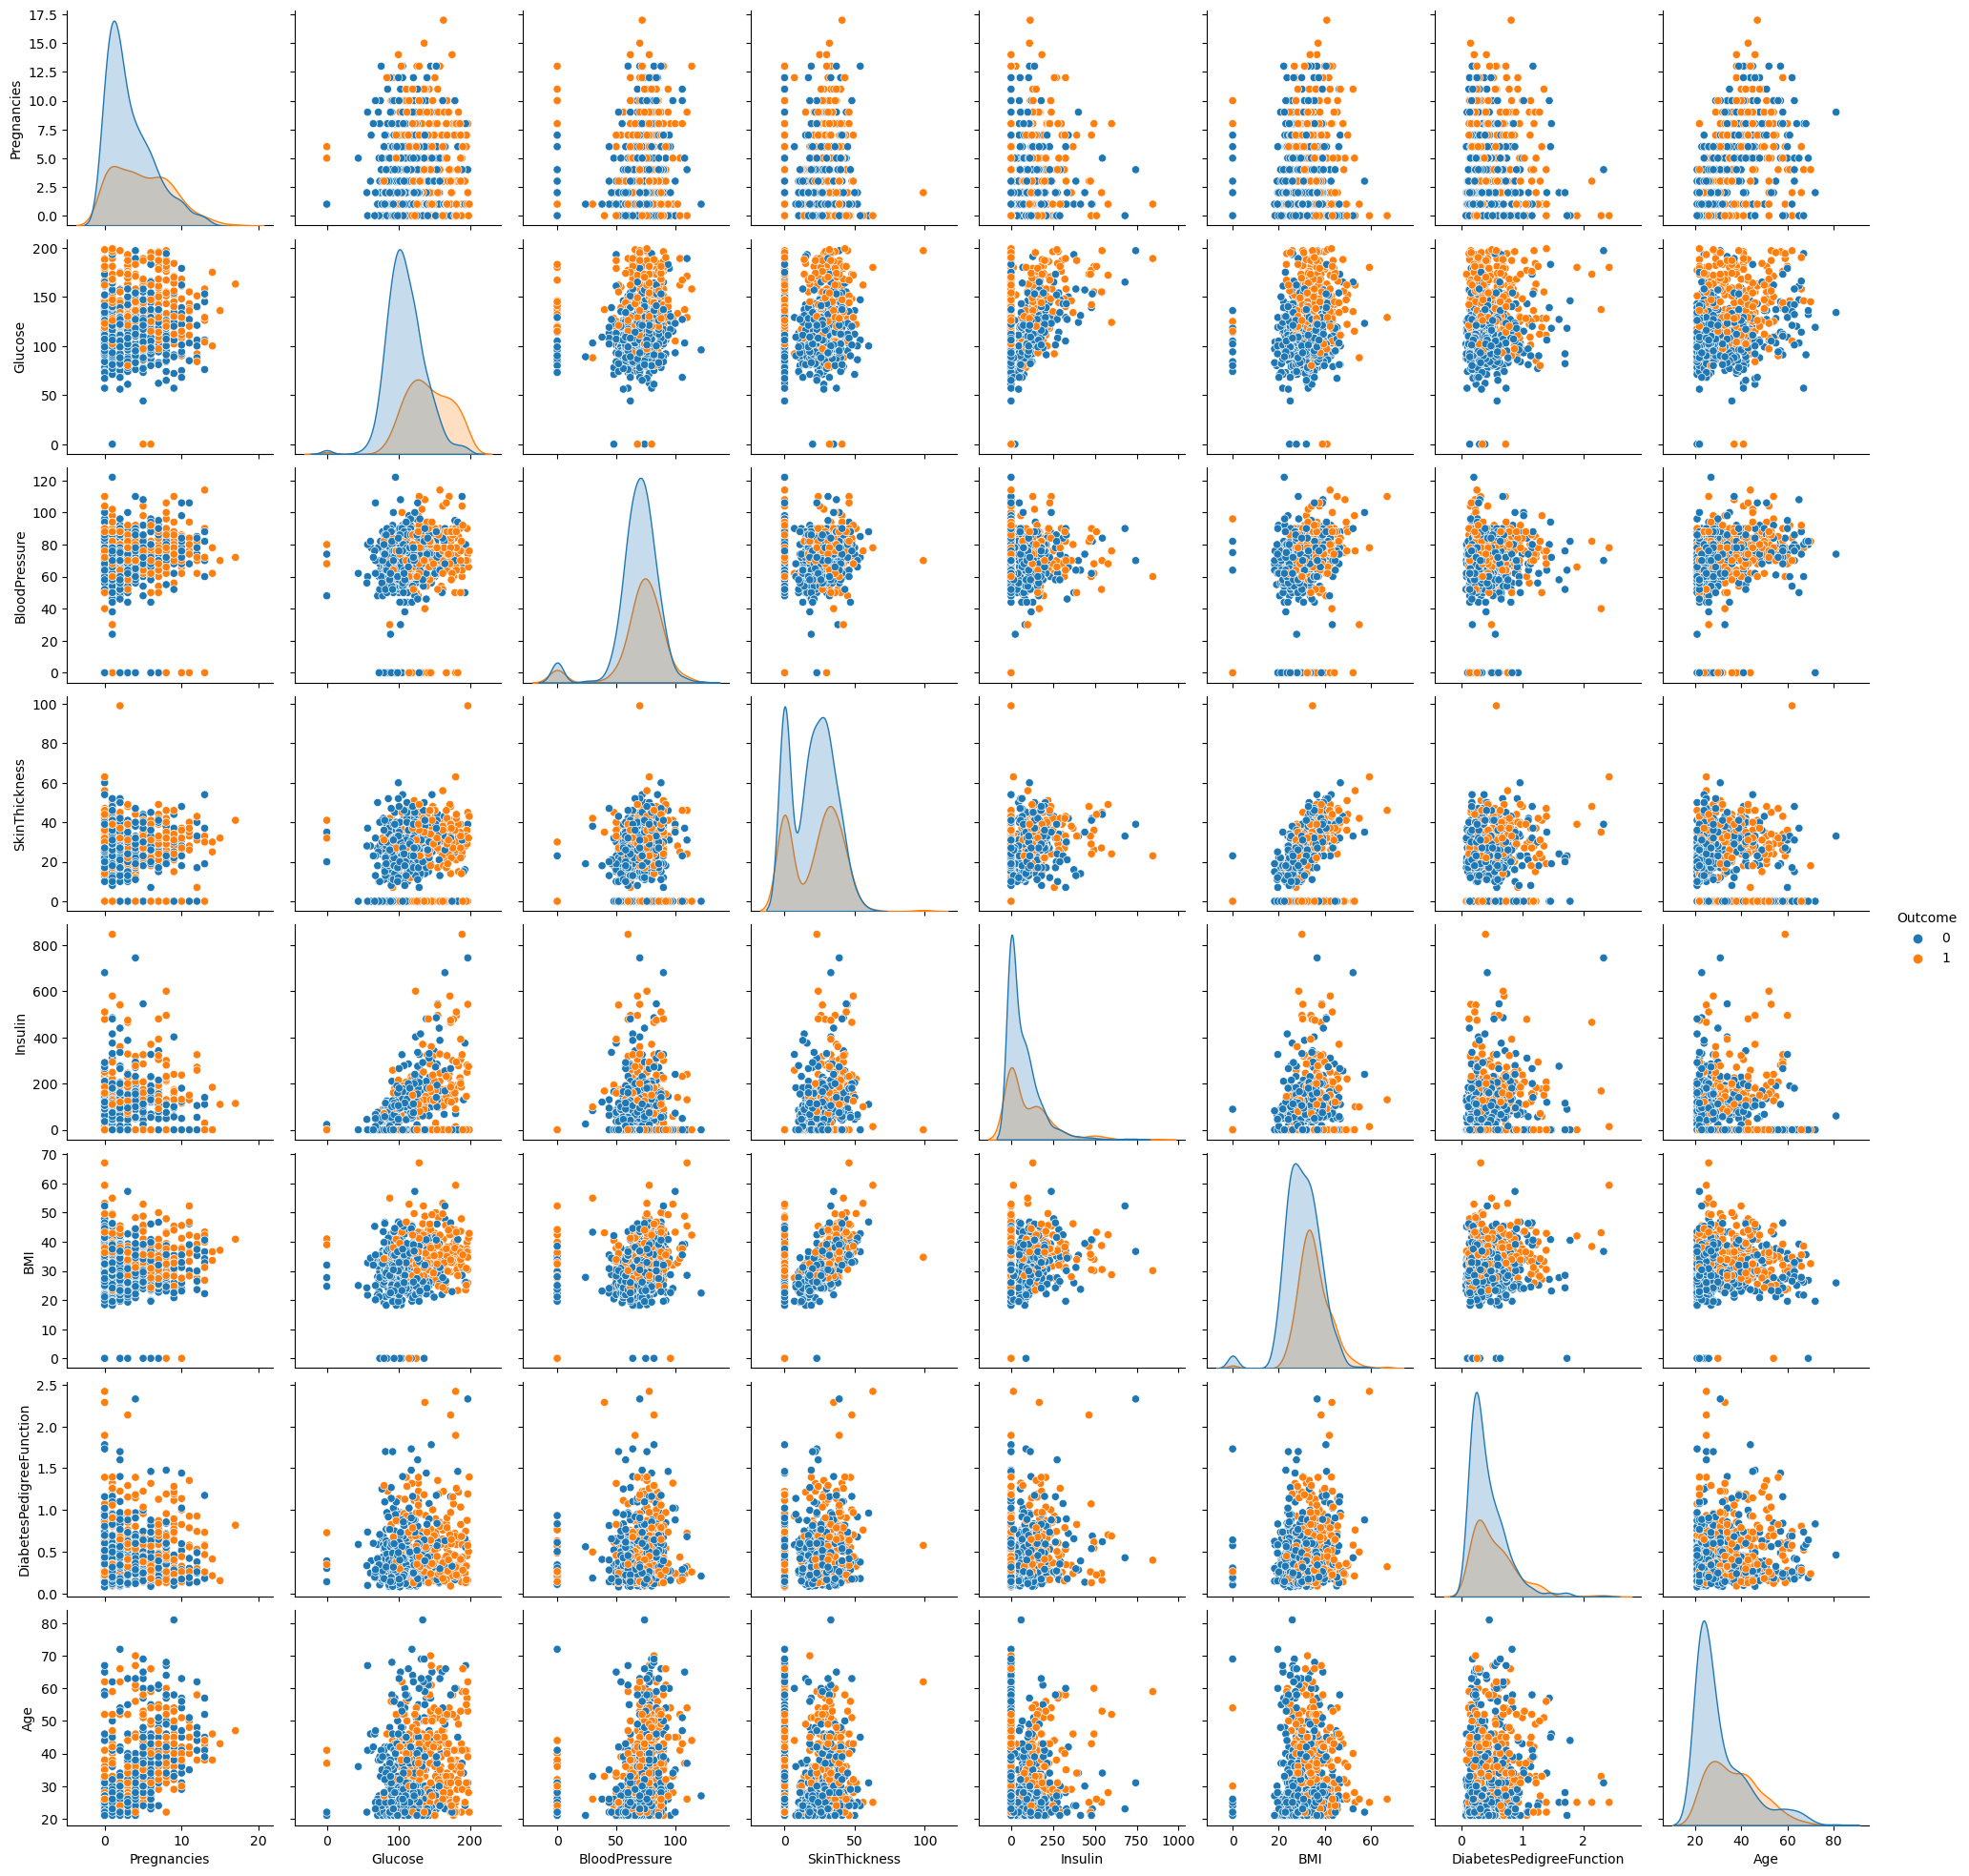

In [91]:
# Visualize relationships across different categories or features
sns.pairplot(data, hue=target, diag_kind='kde')
plt.show()

- Use sns.pairplot to create pair plots of all features color-coded by the target variable, helping to visualize relationships and distributions.
  
- Create box plots for each feature against the target variable to observe differences in distributions.

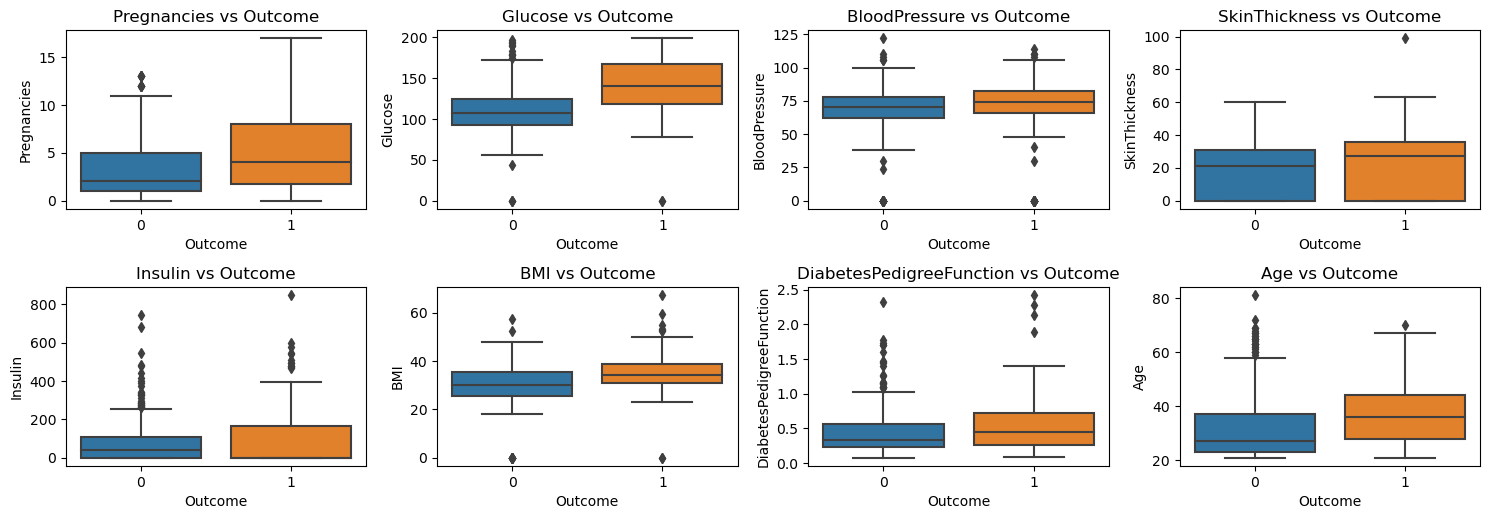

In [138]:
# Create box plots for each feature against the target variable to observe differences in distributions.
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=target, y=column, data=data)
    plt.title(f'{column} vs {target}')
plt.tight_layout()
plt.show()

- This code creates box plots for each feature in your dataset against the target variable. It arranges these plots in a 3x3 grid, allowing you to compare how the distribution of each feature varies with the target variable. Box plots are useful for visualizing the spread and skewness of the data, as well as for identifying outliers.

- So, for each feature, you will see a plot that shows how the values of that feature are distributed for each category of the target variable. This helps in understanding which features might be important in distinguishing between different target categories

In [142]:
# Standardize the features using StandardScaler from scikit-learn.(excluding the target variable Outcome)
from sklearn.preprocessing import StandardScaler

features = data.columns[:-1]
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

print(data.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


- StandardScaler is a class from the sklearn.preprocessing module. It standardizes features by removing the mean and scaling to unit variance.
The result is a new DataFrame where each feature has been standardized. The mean of each column will be 0, and the standard deviation will be 1.
This standardized data replaces the original data in the DataFrame for those feature columns.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


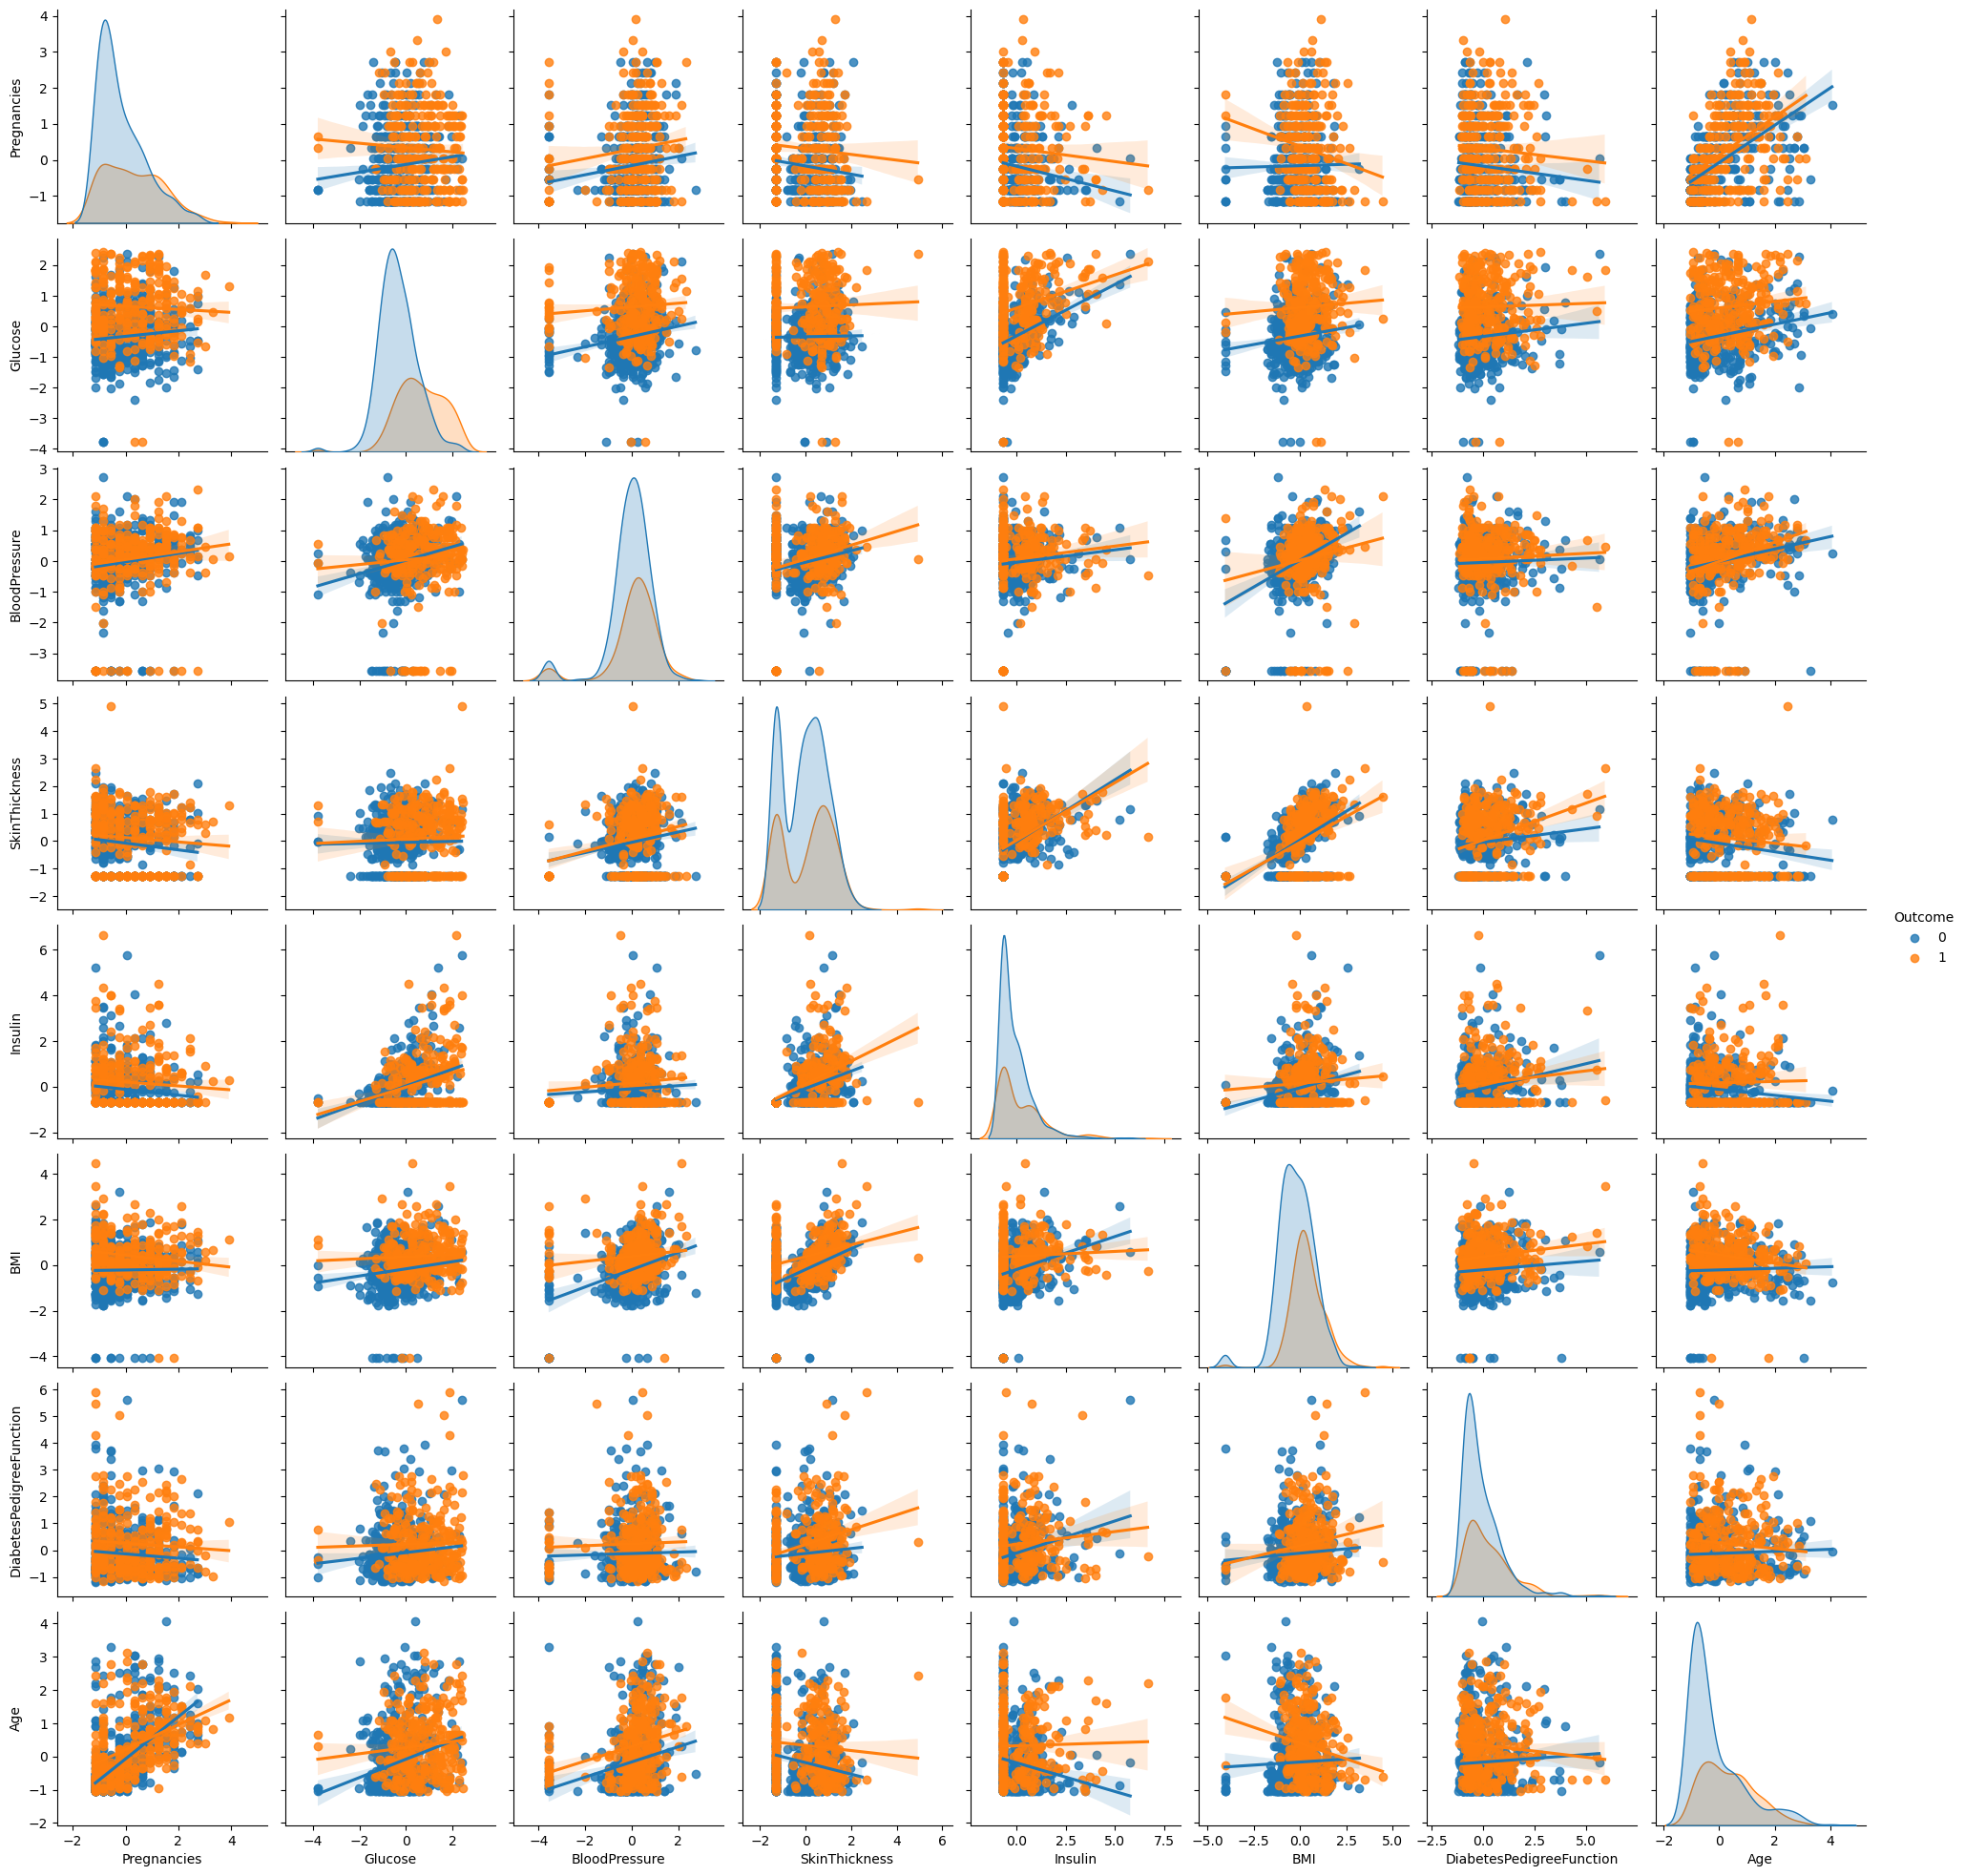

In [143]:
# Pair plot with regression lines
sns.pairplot(data, kind='reg', hue=target)
plt.show()

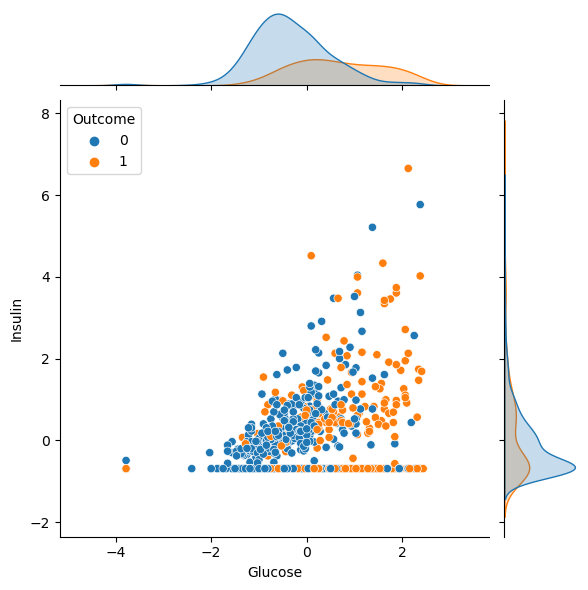

In [146]:
# Joint plot for two important features
sns.jointplot(x='Glucose', y='Insulin', data=data, hue=target)
plt.show()

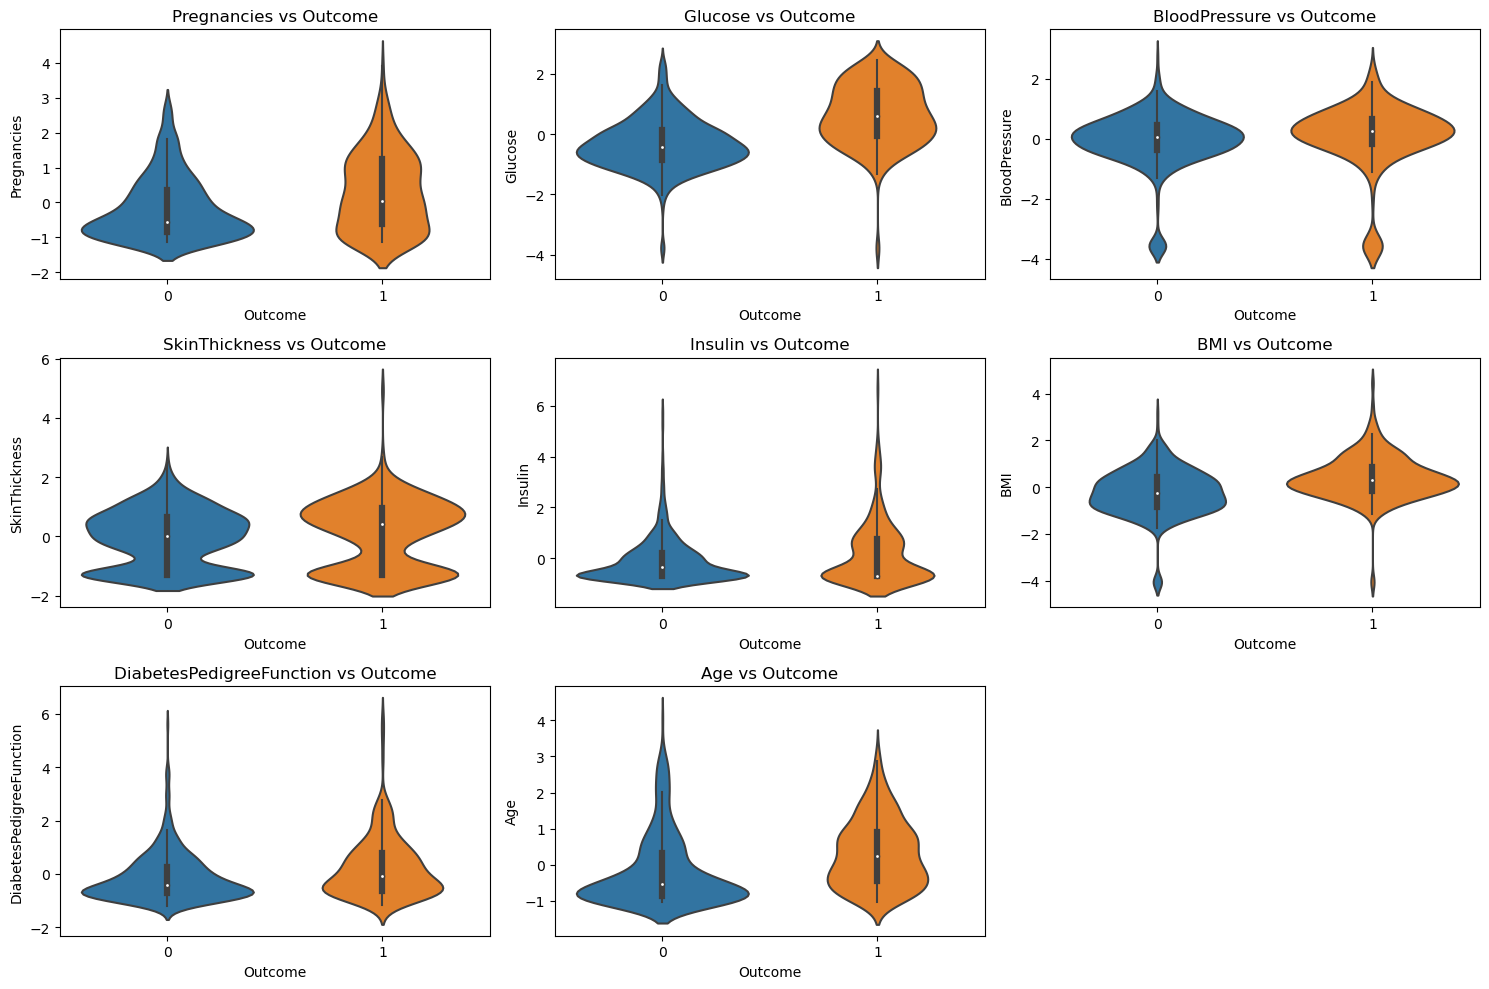

In [147]:
# Violin plot for feature distributions across target variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=target, y=column, data=data)
    plt.title(f'{column} vs {target}')
plt.tight_layout()
plt.show()

- Pair plot with regression lines: Visualize pairwise relationships between features with regression lines to identify linear relationships.

- Joint plot: Visualize the relationship between two specific features with a regression line, color-coded by the target variable.

- Violin plot: Show the distribution of each feature across the categories of the target variable. Violin plots combine aspects of box plots and KDE plots, providing more information about the distribution shape.

Multivariate Analysis and Predictive Modeling are the topics that we will be covering in future assignments.